In [32]:
import scipy.spatial
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#based on https://stackoverflow.com/questions/19634993/volume-of-voronoi-cell-python
def volumes(datafile):
    data = np.loadtxt(datafile)
    vor = scipy.spatial.Voronoi(data)
    np.shape(vor.vertices)
    vol = np.zeros(vor_sphere.npoints)
    for i, region in enumerate(vor.point_region):
        ids = vor.regions[region]
        if -1 in ids: 
            vol[i] = np.inf
        else:
            vol[i] = scipy.spatial.ConvexHull(vor.vertices[ids]).volume
    return vol

In [34]:
vol_clustered = volumes("../data/sphere_00_stdcosmo_norsd_z0.100.dat")

In [42]:
vol_clustered_percent = volumes("../data/p_010_sphere_00_stdcosmo_norsd_z0.100.dat")

In [35]:
vol_random = volumes("../data/random_sphere_00_stdcosmo_norsd_z0.100.dat")

In [43]:
vol_random_percent = volumes("../data/p_010_random_sphere_00_stdcosmo_norsd_z0.100.dat")

In [49]:
vol_clustered = vol_clustered[~np.isinf(vol_clustered)]
vol_random = vol_random[~np.isinf(vol_random)]
vol_clustered_percent = vol_clustered_percent[~np.isinf(vol_clustered_percent)]
vol_random_percent = vol_random_percent[~np.isinf(vol_random_percent)]

vol_clustered = vol_clustered[~np.isinf(vol_clustered)]
vol_random = vol_random[~np.isinf(vol_random)]
vol_clustered_percent = vol_clustered_percent[vol_clustered_percent>0]
vol_random_percent = vol_random_percent[vol_random_percent>0]

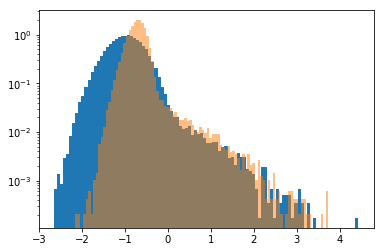

In [52]:
_ = plt.hist(np.log10(vol_clustered/vol_clustered.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_random/vol_random.mean()), bins=100, log=True, density=True, alpha=0.5)

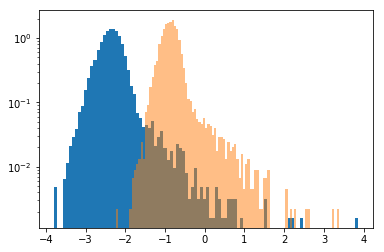

In [54]:
_ = plt.hist(np.log10(vol_clustered_percent/vol_clustered_percent.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_random_percent/vol_random_percent.mean()), bins=100, log=True, density=True, alpha=0.5)

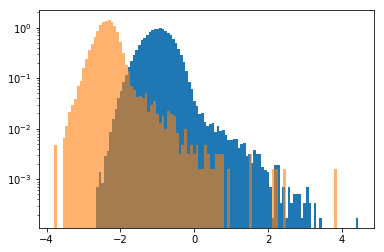

In [62]:
_ = plt.hist(np.log10(vol_clustered/vol_clustered.mean()), bins=100, log=True, density=True)
_ = plt.hist(np.log10(vol_clustered_percent/vol_clustered_percent.mean()), bins=100, log=True, density=True, alpha=0.6)


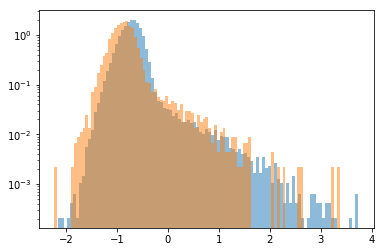

In [61]:
_ = plt.hist(np.log10(vol_random/vol_random.mean()), bins=100, log=True, density=True, alpha=0.5)
_ = plt.hist(np.log10(vol_random_percent/vol_random_percent.mean()), bins=100, log=True, density=True, alpha=0.5)